Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.

- Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.


In [5]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_pair = pd.read_csv('pair_sin_nulos.csv', index_col=0)

Instrucciones:
Calcula las siguientes estadísticas descriptivas para las variables numéricas:
Media
Mediana
Desviación estándar
Mínimo
Máximo


In [9]:
columnas_num = df_pair.select_dtypes(exclude='O').agg(['mean', 'median', 'std', 'min', 'max']).round(decimals=2)
columnas_num 

,density,agriculturalland,landarea,birthrate,callingcode,co2-emissions,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,lifeexpectancy,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,lattitude,longitude,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
mean,356.76,39.13,686700.71,20.15,360.01,171858.35,2.68,32.01,4.727532e+11,102.47,21.11,72.32,32.57,1.83,3.922447e+07,2.185258e+07,19.08,20.24,163103.46,186.14,6.45,1.02,38.16,156.21,2.67,62.69,16.95,40.82,6.98
median,89.00,39.60,119511.00,17.95,255.50,12303.00,2.24,32.00,3.438723e+10,102.55,14.00,73.20,30.70,1.46,8.826588e+06,4.678104e+06,17.27,20.97,40000.00,125.08,2.30,1.00,34.60,58.00,1.56,62.60,17.10,37.70,5.61
std,1982.89,21.39,1917085.01,9.80,322.49,824096.71,1.26,23.36,2.161411e+12,12.91,19.29,7.33,18.83,1.66,1.447345e+08,7.450449e+07,23.90,66.54,361666.99,380.52,23.45,0.36,28.46,226.02,2.82,10.04,6.65,19.92,4.87
min,2.00,0.60,0.00,5.90,1.00,11.00,0.98,0.00,4.727146e+07,23.40,1.40,52.80,0.20,0.01,8.360000e+02,5.464000e+03,-40.90,-175.20,0.00,99.03,-4.30,0.00,0.80,2.00,0.01,38.00,0.00,8.00,0.09
max,26337.00,82.60,17098240.00,46.08,1876.00,9893038.00,6.91,98.30,2.142770e+13,142.50,84.50,85.40,81.60,8.42,1.397715e+09,8.429340e+08,64.96,178.07,3031000.00,4583.71,254.90,2.00,136.60,1150.00,13.59,86.80,37.20,219.60,28.18


Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.


In [10]:
#pais con mayor densidad de población
df_pair.groupby('country')['density'].max().sort_values( ascending=False).reset_index().head(1)

,country,density
0,Monaco,26337.0


In [11]:
#pais con menor densidad de población
df_pair.groupby('country')['density'].min().sort_values( ascending=True).reset_index().head(1)

,country,density
0,Mongolia,2.0


Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.


Tiene sentido que los paises con mayor tasa de natalidad sean de África siendo este el continente con mayor tasa de natalidad del mundo

In [16]:
promedio_natalidad= df_pair.groupby('country')['birthrate'].mean().reset_index().sort_values(by= 'birthrate',ascending=False)
promedio_natalidad

,country,birthrate
121,Niger,46.08
32,Chad,42.17
157,Somalia,41.75
102,Mali,41.54
42,Democratic Republic of the Congo,41.18
...,...,...
79,Italy,7.30
3,Andorra,7.20
147,San Marino,6.80
159,South Korea,6.40


Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

- Infant mortality: Número de muertes por cada 1,000 nacidos vivos antes de cumplir un año de edad.


El indice de mortalidad infantil es el porcentaje de muertes cada 1000 nacimientos vivos. La mortalidad infantil refleja la condiciones sociales, económicas y ambientales en la salud de los bebes y sus madres 

In [19]:
df_mortalidad_pais = df_pair.groupby('country')['infantmortality'].mean().reset_index()
df_mortalidad_pais 

,country,infantmortality
0,Afghanistan,47.9
1,Albania,7.8
2,Algeria,20.1
3,Andorra,2.7
4,Angola,51.6
...,...,...
190,Venezuela,21.4
191,Vietnam,16.5
192,Yemen,42.9
193,Zambia,40.4


In [ ]:
df_pair['infantmortality'].unique()

In [25]:
#Función para agregar una columna y categorizar los paises segun su indice de mortalidad infantil
def mortalidad_infantil (numero):
    if numero > 1 and numero <= 20:
        return 'baja'
    elif 20 < numero <= 50:
        return 'moderada'
    else:
        return 'alta'

In [34]:
df_mortalidad_pais['categoria_mortalidad'] = df_mortalidad_pais['infantmortality'].apply(mortalidad_infantil)
df_mortalidad_pais

,country,infantmortality,categoria_mortalidad
0,Afghanistan,47.9,moderada
1,Albania,7.8,baja
2,Algeria,20.1,moderada
3,Andorra,2.7,baja
4,Angola,51.6,alta
...,...,...,...
190,Venezuela,21.4,moderada
191,Vietnam,16.5,baja
192,Yemen,42.9,moderada
193,Zambia,40.4,moderada


In [33]:
df_mortalidad_pais['categoria_mortalidad'].value_counts().reset_index()

,index,categoria_mortalidad
0,baja,119
1,moderada,55
2,alta,21


Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación


 - Fertility Rate: Número promedio de hijos nacidos de una mujer durante su vida.
 - Life expectancy: Número promedio de años que se espera que viva un recién nacido.

 Por lo que poddemos ver en el heatmap no estan relacionadas  ambas variables. 

In [35]:
#Primer paso es crear un dataframe con las columnas que nos interesa
df_correlacion= df_pair[['fertilityrate', 'lifeexpectancy']]
df_correlacion

,fertilityrate,lifeexpectancy
0,4.47,64.5
1,1.62,78.5
2,3.02,76.7
3,1.27,73.2
4,5.52,60.8
...,...,...
190,2.27,72.1
191,2.05,75.3
192,3.79,66.1
193,4.63,63.5


In [27]:
df_corr = df_correlacion.corr('spearman',numeric_only=True)
df_corr

,fertilityrate,lifeexpectancy
fertilityrate,1.00000,-0.83538
lifeexpectancy,-0.83538,1.00000


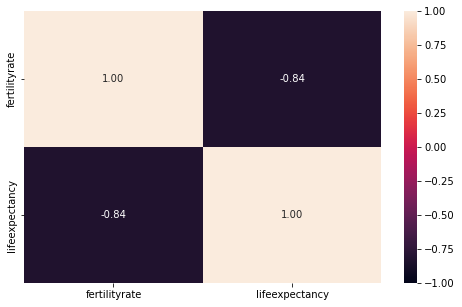

In [32]:
plt.figure(figsize=(8,5))
#mascara = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmax=1, vmin=-1);

Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.


CPI: Índice de Precios al Consumidor (IPC), una medida de la inflación y el poder adquisitivo.

Falta comentar relación

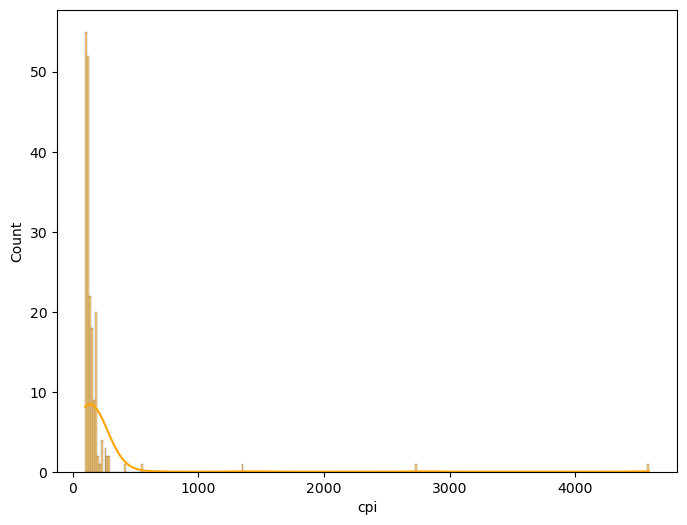

In [38]:
plt.figure(figsize=(8, 6))

sns.histplot(data=df_pair,x='cpi',kde=True, color='orange');

Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).


- GDP: Producto Interno Bruto, el valor total de bienes y servicios producidos en el país.
- Co2-Emissions: Emisiones de dióxido de carbono en toneladas.

Como impacta la actividad económica en el medio ambiente, como crece la actividad económica en un país sin importar el impacto que tenga en el medio ambiente.
La diferencia entre el resultado de ambas variables significa que su actividad económica no impacta en la generacion de co-2?

In [39]:
df_gdp_co2= df_pair[['country', 'gdp', 'co2-emissions']]
df_gdp_co2

,country,gdp,co2-emissions
0,Afghanistan,1.910135e+10,8672.0
1,Albania,1.527808e+10,4536.0
2,Algeria,1.699882e+11,150006.0
3,Andorra,3.154058e+09,469.0
4,Angola,9.463542e+10,34693.0
...,...,...,...
190,Venezuela,4.823593e+11,164175.0
191,Vietnam,2.619212e+11,192668.0
192,Yemen,2.691440e+10,10609.0
193,Zambia,2.306472e+10,5141.0


In [41]:
# Calculamos la diferencia entre el gdp y las emisiones de CO2 del datframe nuevo 
df_gdp_co2['diferencia'] = df_gdp_co2['gdp'] - df_gdp_co2['co2-emissions']

#idxmax srive para encontrar el indcice de la fila que tenga el valor mas alto
pais_mayor_diferencia = df_gdp_co2.loc[df_gdp_co2['diferencia'].idxmax(), 'country']

print("El país con la mayor diferencia entre GDP y CO2 emissions es:", pais_mayor_diferencia)


El país con la mayor diferencia entre GDP y CO2 emissions es: United States


In [42]:
df_gdp_co2

,country,gdp,co2-emissions,diferencia
0,Afghanistan,1.910135e+10,8672.0,1.910135e+10
1,Albania,1.527808e+10,4536.0,1.527807e+10
2,Algeria,1.699882e+11,150006.0,1.699881e+11
3,Andorra,3.154058e+09,469.0,3.154058e+09
4,Angola,9.463542e+10,34693.0,9.463538e+10
...,...,...,...,...
190,Venezuela,4.823593e+11,164175.0,4.823592e+11
191,Vietnam,2.619212e+11,192668.0,2.619211e+11
192,Yemen,2.691440e+10,10609.0,2.691439e+10
193,Zambia,2.306472e+10,5141.0,2.306472e+10


Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.


In [43]:
df_perce_participacion = df_pair[['country', 'populationlaborforceparticipation', 'continente']]
df_perce_participacion .groupby('country')['populationlaborforceparticipation'].mean().reset_index().sort_values(by='populationlaborforceparticipation', ascending=False)

,country,populationlaborforceparticipation
137,Qatar,86.8
98,Madagascar,86.1
156,Solomon Islands,83.8
117,Nepal,83.8
142,Rwanda,83.7
...,...,...
77,Iraq,43.0
169,Tajikistan,42.0
2,Algeria,41.2
83,Jordan,39.3


Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.

In [44]:
df_numericos= df_pair.select_dtypes(exclude='O').reset_index()
df_num_corr= df_numericos.corr('spearman', numeric_only=True)
df_num_corr

,index,density,agriculturalland,landarea,birthrate,callingcode,co2-emissions,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,lifeexpectancy,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,lattitude,longitude,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
index,1.000000,0.056762,0.055270,0.029112,0.019429,0.063924,0.052776,0.041732,-0.028360,0.018995,-0.003061,0.019463,-0.031495,-0.108030,-0.031819,0.066994,0.035332,-0.047439,0.170886,0.164944,0.127684,0.159786,-0.000948,-0.069908,-0.036701,-0.008665,-0.033806,0.032965,-0.196580,-0.057629
density,0.056762,1.000000,0.147372,-0.575566,-0.261107,-0.026299,-0.004837,-0.254869,-0.115015,-0.005706,0.027640,-0.169117,0.211272,0.008887,0.079924,-0.084865,-0.053442,0.137098,0.080157,0.148590,-0.122680,-0.120813,0.164952,0.029286,-0.112639,0.133612,-0.061998,0.006722,-0.034358,-0.154582
agriculturalland,0.055270,0.147372,1.000000,0.144762,0.168414,-0.042598,0.074316,0.160531,-0.384844,0.080768,-0.062459,0.193074,-0.215144,0.103314,-0.078544,0.271296,0.232905,0.006225,-0.010557,0.091195,0.185154,0.214210,0.005388,-0.126268,0.154450,-0.172958,-0.135059,-0.073886,0.156477,0.033408
landarea,0.029112,-0.575566,0.144762,1.000000,0.260225,-0.285017,0.557796,0.241865,-0.135794,0.576958,0.000608,0.209210,-0.188302,0.217933,-0.114266,0.812999,0.758096,-0.050376,0.057418,0.347973,0.309903,0.275242,-0.354331,-0.003842,0.162957,-0.210845,0.001100,-0.345998,0.225024,-0.035172
birthrate,0.019429,-0.261107,0.168414,0.260225,1.000000,0.162260,-0.416292,0.973552,-0.083542,-0.406423,0.067734,0.890643,-0.845522,0.239035,-0.836584,0.133420,-0.011516,-0.581999,0.041091,-0.128597,0.368876,0.227444,-0.253163,-0.772651,0.810556,-0.521941,0.204301,-0.339598,0.154606,-0.035400
callingcode,0.063924,-0.026299,-0.042598,-0.285017,0.162260,1.000000,-0.271189,0.160455,-0.080934,-0.354640,-0.065896,0.100981,-0.145160,-0.055086,-0.071644,-0.344703,-0.354550,-0.042181,0.303996,-0.166866,0.079748,-0.002349,-0.137876,-0.202361,0.053088,-0.143184,0.074340,0.032360,-0.325743,-0.079296
co2-emissions,0.052776,-0.004837,0.074316,0.557796,-0.416292,-0.271189,1.000000,-0.404696,-0.190288,0.928508,-0.040482,-0.442746,0.456404,0.038000,0.486619,0.698006,0.818087,0.382942,0.126665,0.510937,0.049508,0.061858,-0.269087,0.518019,-0.467246,0.181247,-0.157143,-0.160730,0.028587,-0.119832
fertilityrate,0.041732,-0.254869,0.160531,0.241865,0.973552,0.160455,-0.404696,1.000000,-0.069000,-0.405256,0.052884,0.856970,-0.835380,0.179680,-0.801808,0.110406,-0.026000,-0.566365,0.035899,-0.104626,0.342020,0.205087,-0.217967,-0.745585,0.793310,-0.478642,0.189114,-0.317960,0.162215,-0.042110
forestedarea,-0.028360,-0.115015,-0.384844,-0.135794,-0.083542,-0.080934,-0.190288,-0.069000,1.000000,-0.130202,0.112982,-0.034302,-0.005998,-0.182217,-0.064478,-0.185421,-0.184511,-0.174152,-0.081565,-0.053368,-0.055851,-0.018481,0.212227,0.012476,0.026621,-0.004474,0.143181,0.074724,0.097197,-0.037240
gdp,0.018995,-0.005706,0.080768,0.576958,-0.406423,-0.354640,0.928508,-0.405256,-0.130202,1.000000,-0.051681,-0.452560,0.495673,0.007643,0.455130,0.740039,0.832719,0.358806,0.032839,0.451805,-0.000207,0.019607,-0.127169,0.516183,-0.473343,0.227015,-0.106237,-0.164661,0.054056,-0.176782


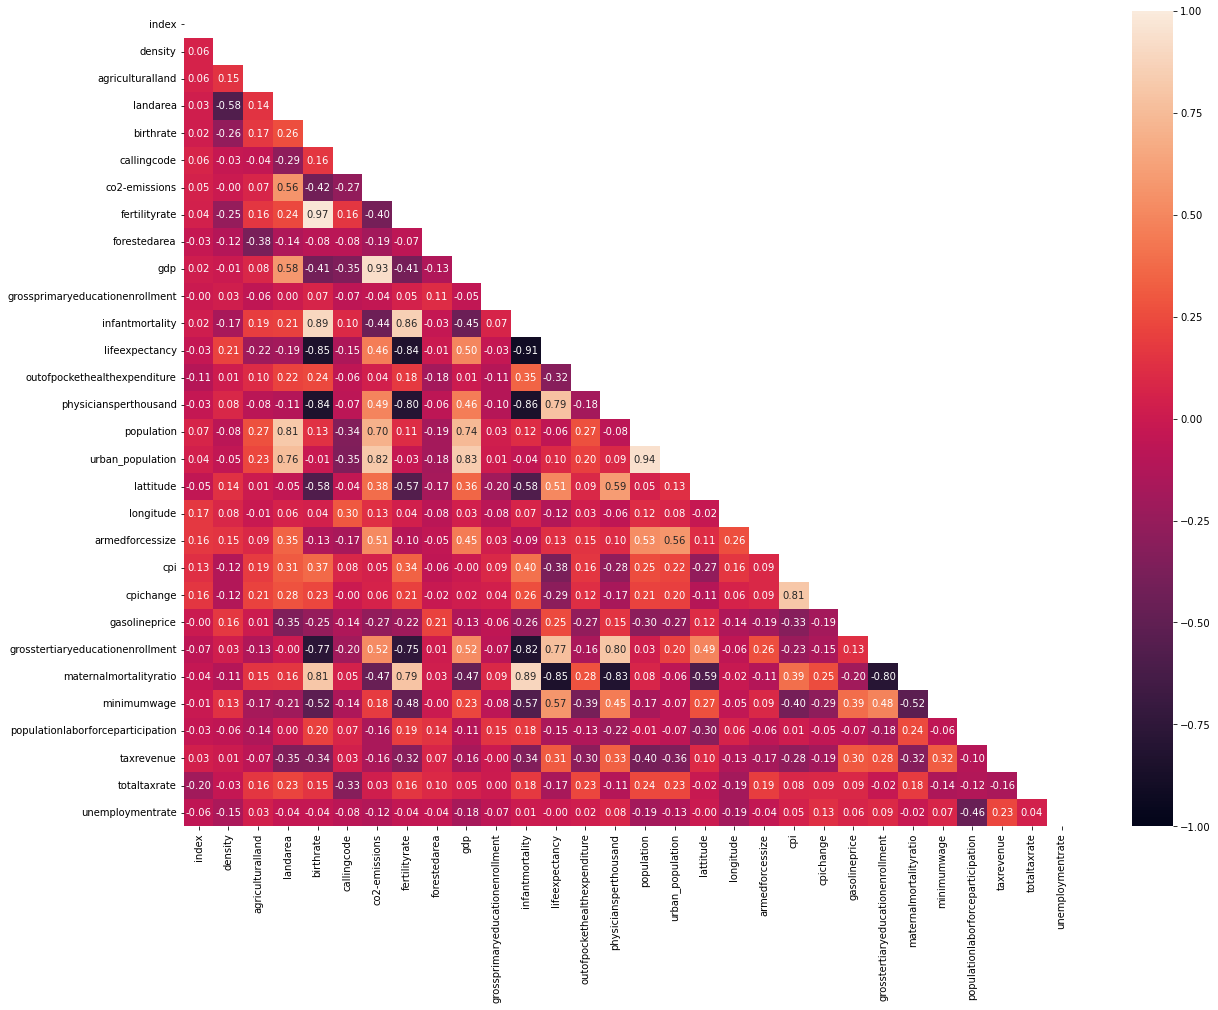

In [56]:
plt.figure(figsize=(20,15))
mascara = np.triu(np.ones_like(df_num_corr, dtype=bool))
sns.heatmap(df_num_corr, annot=True, fmt='.2f', vmax=1, vmin=-1, mask=mascara);


In [55]:
df_pair.head(5)

,country,density,abbreviation,agriculturalland,landarea,birthrate,callingcode,capital/majorcity,co2-emissions,currency-code,fertilityrate,forestedarea,gdp,grossprimaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,urban_population,lattitude,longitude,continente,armedforcessize,cpi,cpichange,gasolineprice,grosstertiaryeducationenrollment,maternalmortalityratio,minimumwage,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate
0,Afghanistan,60.0,AF,58.1,652230.0,32.49,93.0,Kabul,8672.0,AFN,4.47,2.1,1.910135e+10,104.0,47.9,Kabul,64.5,Pashto,78.4,0.28,38041754.0,9797273.0,33.939110,67.709953,Asia,323000.0,149.900,2.30,0.70,9.70,638.0,0.43,48.90,9.30,71.40,11.120
1,Albania,105.0,AL,43.1,28748.0,11.78,355.0,Tirana,4536.0,ALL,1.62,28.1,1.527808e+10,107.0,7.8,Tirana,78.5,Albanian,56.9,1.20,2854191.0,1747593.0,41.153332,20.168331,Europa,9000.0,119.050,1.40,1.36,55.00,15.0,1.12,55.70,18.60,36.60,12.330
2,Algeria,18.0,DZ,17.4,2381741.0,24.28,213.0,Algiers,150006.0,DZD,3.02,0.8,1.699882e+11,109.9,20.1,Algiers,76.7,Arabic,28.1,1.72,43053054.0,31510100.0,28.033886,1.659626,África,317000.0,151.360,2.00,0.28,51.40,112.0,0.95,41.20,37.20,66.10,11.700
3,Andorra,164.0,AD,40.0,468.0,7.20,376.0,Andorra la Vella,469.0,EUR,1.27,34.0,3.154058e+09,106.4,2.7,Andorra la Vella,73.2,Catalan,36.4,3.33,77142.0,67873.0,42.506285,1.521801,Europa,22200.0,108.672,0.92,1.51,59.58,169.0,6.63,60.32,18.24,39.48,6.782
4,Angola,26.0,AO,47.5,1246700.0,40.73,244.0,Luanda,34693.0,AOA,5.52,46.3,9.463542e+10,113.5,51.6,Luanda,60.8,Portuguese,33.4,0.21,31825295.0,21061025.0,-11.202692,17.873887,África,117000.0,261.730,17.10,0.97,9.30,241.0,0.71,77.50,9.20,49.10,6.890
